This notebook is meant for registering between the 24 polarization state combinations in Mueller registration using the instrument at the Vitkin laboratory in Toronto, Canada.

Each time the instrument shifts polarization state, the image shifts - either greatly for output state, or slightly for input state. Registering 23 states to a single base state using an affine transform can greatly improve the quality.  This code covers first finding these transforms, and then applying them to correct for these shifts.

In [1]:
import javabridge
import bioformats as bf
from pathlib import Path
import numpy as np

from multiscale.polarimetry.preprocessing import calculate_polarization_state_transforms
from multiscale.polarimetry.preprocessing import bulk_apply_polarization_transforms
import multiscale.itk.registration as reg

We first need to start up the javabridge, which lets us open up CZI files. 


In [2]:
javabridge.start_vm(class_path=bf.JARS, max_heap_size='8G')

Next, we define the registration parameters.  These are some of the knobs one can adjust for speed/quality of the registration.  In particular, the sampling percentage determines how much of the image is calculated on for each registration step.

The default value of 0.01 works well for most states, except for the cross-polarization states where almost all the image is dark.  The default value still works though because the script lets you change the sampling percentage if you extract a sub-region to register base on.  In the case of the cross-images, you'll want to find a small piece of anatomy that still shows up brightly and zoom in on that.

In [3]:
registration_parameters = reg.setup_registration_parameters(scale=1, iterations=100, learning_rate=np.double(3), min_step=np.double(0.01),
                                  gradient_tolerance=np.double(1E-6), sampling_percentage=0.01)

Now we set up the paths to the czi files we want to register, and to the various outputs.

In [4]:
czi_images_dir = Path(r'F:\Research\Polarimetry\Data 01 - Raw and imageJ proccessed images\Mueller raw\LR czi images')
img_to_register_path = Path(czi_images_dir, '1367 slide 5.czi')
img_output_dir = Path(r'F:\Research\Polarimetry\Data 01 - Raw and imageJ proccessed images\Mueller raw\LR Registered')
transform_output_dir = Path(r'F:\Research\Polarimetry\Data 01 - Raw and imageJ proccessed images\Mueller raw\LR Transforms')
transform_prefix = 'MLR_Position'


Now we define our final variable - the resolution of the image.  Some of the czi files do not have the physical pixel size, and so it must be pre-defined.

Our registration framework works in real-space, so we need to be consisten with physical distances.

In [5]:
img_resolution = 2.016

Next we run the command to calculate the transform.  This enters into a series of queries/image checking states.

No transform found.  Writing blank transform for MLR_Position_2.tfm
Registering 1 to 0


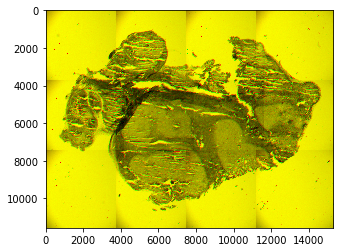

Do you want to change the rotation? [y/n] >> n
Do you want to change the initial translation? [y/n] >> y
Current physical shift: [-0. -0.]
Enter the new shift in dimension 0 >> 50
Enter the new shift in dimension 1 >> 50


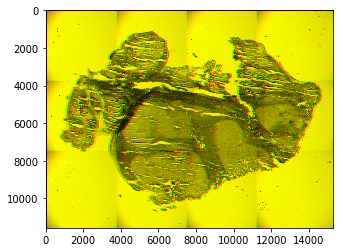

Is this translation good? [y/n] >>> y
Do you wish to extract a sub-region to register based on? [y/n] >> n


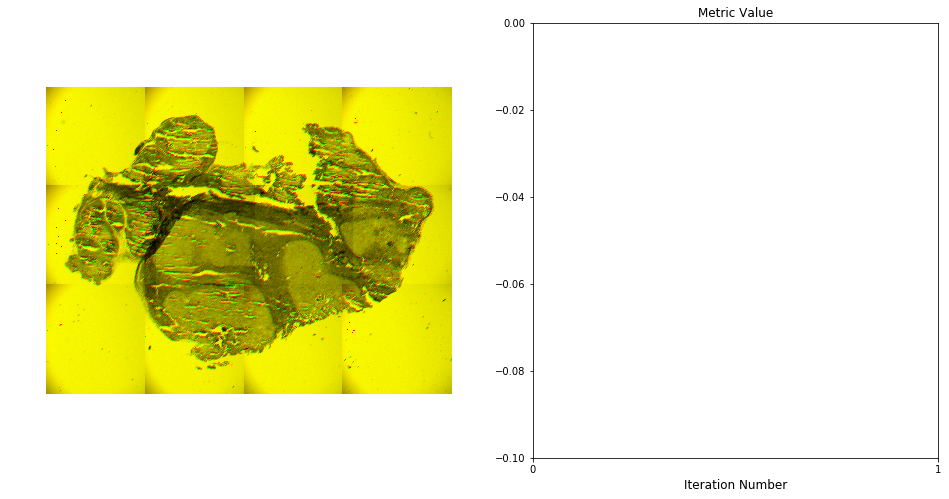

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Registration complete


<Figure size 432x288 with 0 Axes>


Final metric value: -1.7319099166959868

RegularStepGradientDescentOptimizerv4: Maximum number of iterations (100) exceeded.

Transform Matrix: 
[[1.00084172e+00 1.25325770e-03]
 [9.33800783e-05 1.00013810e+00]]

Transform Translation: 
[ 23.38415506 -34.45827358]


In [ ]:
calculate_polarization_state_transforms(img_to_register_path, img_resolution, transform_output_dir, transform_prefix,
                                        registration_parameters)